# Compare CASTEP al3x3 benchmark performance

This notebook compares the performance of the small al3x3 benchmark across different UK HPC facilities.

Facilities included:

+ [Cirrus@EPCC](http://www.cirrus.ac.uk): HPE/SGI Ice XA. 2x 18-core Xeon (Broadwell) per node. FDR hypercube
+ Thomas@MMM: 2x 12-core Xeon (Broadwell) per node, ?DR 1:1 non-blocking (at the node counts investigated here)
+ Athena@HPCM+: 2x 14-core Xeon (Broadwell) per node, EDR 1:1 non-blocking (at the node counts investigated here)

In [1]:
import re
from matplotlib import pyplot as plt
%matplotlib inline

Define a function to get the mean SCF cycle time from CASTEP output files. Minimum and maximum times found are removed before mean is computed to remove skewing due to long first step or very short step.

In [2]:
def getmeancycle(castepfilename):
    infile = open(castepfilename, 'r')
    tvals = []
    for line in infile:
        if re.search('<-- SCF', line):
            line = line.strip()
            tokens = line.split()
            if re.match('[0-9]+', tokens[0].lstrip()):
                tvals.append(float(tokens[4]))
    infile.close()

    deltat = []
    for i in range(len(tvals)-1):
        deltat.append(tvals[i+1] - tvals[i])
        
    deltat.remove(max(deltat))
    deltat.remove(min(deltat))
    
    return sum(deltat)/len(deltat)

Cirrus results have versions compiled with both SGI MPT and Intel MPI

In [4]:
cirrusmptfiles = {1:'../al3x3/results/Cirrus/16.11_intel17_mpt214/al3x3.castep.1nodes',
                  2:'../al3x3/results/Cirrus/16.11_intel17_mpt214/al3x3.castep.2nodes',
                  4:'../al3x3/results/Cirrus/16.11_intel17_mpt214/al3x3.castep.4nodes'}

In [5]:
thomasfiles = {1:'../al3x3/results/Thomas/al3x3.castep.1nodes',
               2:'../al3x3/results/Thomas/al3x3.castep.2nodes'}

In [6]:
athenafiles = {1:'../al3x3/results/Athena/al3x3.castep.1nodes',
               2:'../al3x3/results/Athena/al3x3.castep.2nodes',
               4:'../al3x3/results/Athena/al3x3.castep.4nodes'}

## Cirrus (MPT 2.14)

In [27]:
cirrusmptnodes = []
cirrusmptscf = []
cirrusmptspeedup = []
print "{:>15s} {:>15s} {:>15s}".format('Nodes', 'Mean SCF (s)', 'Speedup')
print "{:>15s} {:>15s} {:>15s}".format('=====', '============', '=======')
for nodes, filename in cirrusmptfiles.iteritems():
    cirrusmptnodes.append(nodes)
    scf = getmeancycle(filename)
    cirrusmptscf.append(scf)
    speedup = cirrusmptscf[0]/scf
    cirrusmptspeedup.append(speedup)
    print "{:>15d} {:>15.1f} {:>15.2f}".format(nodes, scf, speedup)

          Nodes    Mean SCF (s)         Speedup
          =====    ============         =======
              1          1319.3            1.00
              2            50.0           26.36
              4            31.4           42.06


## Thomas

In [26]:
thomasnodes = []
thomasscf = []
thomasspeedup = []
print "{:>15s} {:>15s} {:>15s}".format('Nodes', 'Mean SCF (s)', 'Speedup')
print "{:>15s} {:>15s} {:>15s}".format('=====', '============', '=======')
for nodes, filename in thomasfiles.iteritems():
    thomasnodes.append(nodes)
    scf = getmeancycle(filename)
    thomasscf.append(scf)
    speedup = thomasscf[0]/scf
    thomasspeedup.append(speedup)
    print "{:>15d} {:>15.1f} {:>15.2f}".format(nodes, scf, speedup)

          Nodes    Mean SCF (s)         Speedup
          =====    ============         =======
              1           123.3            1.00
              2            52.9            2.33


## Athena

In [25]:
athenanodes = []
athenascf = []
athenaspeedup = []
print "{:>15s} {:>15s} {:>15s}".format('Nodes', 'Mean SCF (s)', 'Speedup')
print "{:>15s} {:>15s} {:>15s}".format('=====', '============', '=======')
for nodes, filename in athenafiles.iteritems():
    athenanodes.append(nodes)
    scf = getmeancycle(filename)
    athenascf.append(scf)
    speedup = athenascf[0]/scf
    athenaspeedup.append(speedup)
    print "{:>15d} {:>15.1f} {:>15.2f}".format(nodes, scf, speedup)

          Nodes    Mean SCF (s)         Speedup
          =====    ============         =======
              1           100.6            1.00
              2            48.7            2.07
              4            40.1            2.51


## Performance Comparison

### Mean SCF cycle time

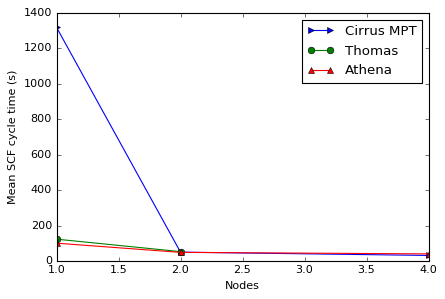

In [10]:
plt.plot(cirrusmptnodes, cirrusmptscf, '>-', label='Cirrus MPT')
plt.plot(thomasnodes, thomasscf, 'o-', label='Thomas')
plt.plot(athenanodes, athenascf, '^-', label='Athena')
plt.xlabel('Nodes')
plt.ylabel('Mean SCF cycle time (s)')
plt.legend()

### Speedup (relative to 1 node)

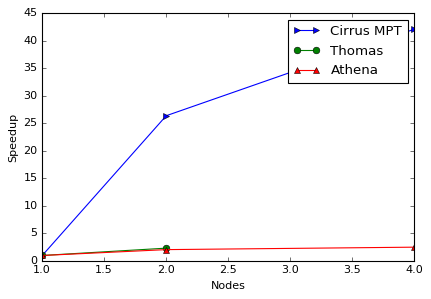

In [28]:
plt.plot(cirrusmptnodes, cirrusmptspeedup, '>-', label='Cirrus MPT')
plt.plot(thomasnodes, thomasspeedup, 'o-', label='Thomas')
plt.plot(athenanodes, athenaspeedup, '^-', label='Athena')
plt.xlabel('Nodes')
plt.ylabel('Speedup')
plt.legend()